In [50]:
import dask.dataframe as dd
from dask_ml.model_selection import train_test_split
from dask_ml.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = dd.read_csv('./Ninapro_DB1.csv')

In [5]:
type(df)
df_shffle = df.shuffle(on=['exercise'])

In [7]:
df.head(10)

,Unnamed: 0,emg_0,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,...,glove_18,glove_19,glove_20,glove_21,exercise,stimulus,restimulus,repetition,rerepetition,subject
0,0,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0146,0.0488,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
1,1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0122,0.0439,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
2,2,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0073,0.0366,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
3,3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0073,0.0049,0.0317,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
4,4,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
5,5,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
6,6,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
7,7,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0317,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
8,8,0.0049,0.0024,0.0024,0.0024,0.0024,0.0073,0.0098,0.0317,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10
9,9,0.0073,0.0024,0.0024,0.0024,0.0049,0.0073,0.0195,0.0366,0.0024,...,141.0,150.0,147.0,113.0,1,0,0,0,0,10


In [15]:
print('values are :- {}'.format(df['exercise'].value_counts()))

values are :- Dask Series Structure:
npartitions=1
    int64
      ...
Name: count, dtype: int64
Dask Name: value-counts-agg, 4 graph layers


In [16]:
#Dropping the corresponding index column
df = df.drop('Unnamed: 0',axis= 1)
df = df.drop('stimulus',axis=1)
df = df.drop('restimulus',axis=1)
df = df.drop('repetition',axis=1)
df = df.drop('rerepetition',axis=1)
df = df.drop('subject',axis=1)


In [17]:
df.columns

Index(['emg_0', 'emg_1', 'emg_2', 'emg_3', 'emg_4', 'emg_5', 'emg_6', 'emg_7',
       'emg_8', 'emg_9', 'glove_0', 'glove_1', 'glove_2', 'glove_3', 'glove_4',
       'glove_5', 'glove_6', 'glove_7', 'glove_8', 'glove_9', 'glove_10',
       'glove_11', 'glove_12', 'glove_13', 'glove_14', 'glove_15', 'glove_16',
       'glove_17', 'glove_18', 'glove_19', 'glove_20', 'glove_21', 'exercise'],
      dtype='object')

In [18]:
X = df.loc[:,'emg_0':'glove_21']
Y = df['exercise']

In [19]:
X.head()

,emg_0,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,...,glove_12,glove_13,glove_14,glove_15,glove_16,glove_17,glove_18,glove_19,glove_20,glove_21
0,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0146,0.0488,0.0024,0.0317,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0
1,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0122,0.0439,0.0024,0.0317,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0
2,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.0073,0.0366,0.0024,0.0293,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0
3,0.0049,0.0024,0.0024,0.0024,0.0024,0.0073,0.0049,0.0317,0.0024,0.0269,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0
4,0.0049,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,0.0220,...,104.0,69.0,160.0,128.0,129.0,86.0,141.0,150.0,147.0,113.0


In [21]:
Y.tail()

189139    3
189140    3
189141    3
189142    3
189143    3
Name: exercise, dtype: int64

In [23]:
labels = Y.unique()
labels

Dask Series Structure:
npartitions=1
    int64
      ...
Name: exercise, dtype: int64
Dask Name: unique-agg, 10 graph layers

In [25]:
X = np.array(X)
Y = np.array(Y)
print('shape of X is {a} and that of Y is {b}'.format(a = X.shape,b = Y.shape))

KeyboardInterrupt: 

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,shuffle=True,test_size=0.20)

In [28]:
X_test.head()

,emg_0,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,...,glove_12,glove_13,glove_14,glove_15,glove_16,glove_17,glove_18,glove_19,glove_20,glove_21
151420,0.0073,0.0024,0.0024,0.0024,0.0024,0.0024,0.0635,0.0879,0.0024,0.0024,...,103.0,77.0,155.000000,132.000000,127.000000,109.000000,144.0,172.000000,148.0,111.0
1467,0.0024,1.4136,0.9668,0.3003,0.1514,0.1587,0.4492,0.4004,0.3101,0.3027,...,90.0,77.0,147.324355,106.000000,100.000000,86.000000,140.0,175.162177,139.0,112.0
629,0.0024,0.5737,0.3979,0.1172,0.0659,0.1123,0.5396,0.2417,0.1489,0.4224,...,93.0,74.0,115.929147,111.000000,106.000000,85.000000,138.0,146.000000,141.0,111.0
48805,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0464,0.0220,0.0024,...,91.0,69.0,172.000000,108.000000,76.000000,80.000000,142.0,180.000000,140.0,112.0
17546,0.0439,0.0513,0.0098,0.0024,0.0024,0.0171,0.3027,0.0732,0.0562,0.4028,...,86.0,74.0,167.000000,103.680212,72.680212,80.680212,145.0,180.000000,137.0,113.0


In [29]:
X_train.head()

,emg_0,emg_1,emg_2,emg_3,emg_4,emg_5,emg_6,emg_7,emg_8,emg_9,...,glove_12,glove_13,glove_14,glove_15,glove_16,glove_17,glove_18,glove_19,glove_20,glove_21
73378,0.0024,0.1758,0.1636,0.0195,0.0049,0.0342,0.5151,0.2515,0.5591,0.2954,...,108.0,67.000000,159.0,115.0,98.0,76.0,139.0,171.0,150.0,115.0
124468,0.0146,0.0024,0.0342,0.0024,0.0024,0.0024,0.0342,0.0903,0.1807,0.0024,...,133.0,72.000000,165.0,133.0,186.0,116.0,148.0,129.0,169.0,111.0
9268,0.0024,0.0806,0.0073,0.0024,0.0024,0.0024,0.0098,0.0439,0.0708,0.0024,...,94.0,68.000000,156.0,108.0,98.0,87.0,141.0,179.0,142.0,114.0
187897,0.0073,0.0464,0.1611,0.1001,0.0049,0.0122,0.1294,0.5493,0.1196,0.0464,...,82.0,86.320494,163.0,95.0,68.0,87.0,144.0,181.0,134.0,107.0
66116,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0903,0.0952,0.0024,0.0098,...,89.0,79.000000,165.0,116.0,75.0,79.0,151.0,157.0,138.0,111.0


In [30]:
Y_train.head(10)

73378     1
124468    2
9268      1
187897    2
66116     1
10857     1
67327     1
139045    2
6999      1
81539     1
Name: exercise, dtype: int64

In [31]:
Y_test.head(10)

151420    2
1467      1
629       1
48805     1
17546     1
90381     1
101050    2
46619     1
15582     1
48057     1
Name: exercise, dtype: int64

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [36]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)
Y_preds = model.predict(X_test)

In [37]:
Y_preds

array([2, 1, 1, ..., 3, 3, 3], dtype=int64)

In [38]:
cm = confusion_matrix(y_true=Y_test,y_pred=Y_preds)
ac = accuracy_score(y_true=Y_test,y_pred=Y_preds)
print('The accuracy score is : {a}'.format(a = ac))

The accuracy score is : 0.999813078375958


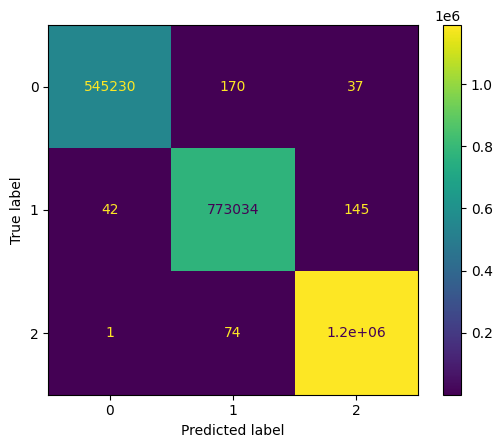

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

KNN

In [43]:
x_knn = X
y_knn = Y

In [45]:
x_knn_train,x_knn_test,y_knn_train,y_knn_test = train_test_split(x_knn,y_knn,random_state=42,shuffle=True,test_size=0.20)

In [44]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2,10,1)

In [ ]:
n = 1
for neighbor in n_neighbors:
    #Varying the hyperparameter of n_neighbors to get appropriate value
    #i.e. to avoid underfitting and overfitting
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    #Fitting the new model
    knn.fit(x_knn_train,y_knn_train)
    #Getting the corresponding accuracy score for both train as well as test set
    train_score[neighbor] = knn.score(x_knn_train,y_knn_train)
    test_score[neighbor] = knn.score(x_knn_test,y_knn_test)
    #simple tracing of neighbours done till time t
    print(f'neighbour {n} done'.format(n = n))
    n+=1


In [ ]:
#Plotting the values of corresponding accuracy score acheived on diff.
#vals of n_neighbors
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 13)
plt.grid()
plt.show()

In [51]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(x_knn_train,y_knn_train)
y_knn_preds = knn_classifier.predict(x_knn_test)

In [ ]:
cm = confusion_matrix(y_true=y_knn_test,y_pred=y_knn_preds)
ac = accuracy_score(y_true=y_knn_test,y_pred=y_knn_preds)
print('The accuracy score is : {a}'.format(a = ac))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()